<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Linear Regression</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 0c0efc0550667444bda0fe2438f90df694d9769e

numpy     : 1.19.2
json      : 2.0.9
watermark : 2.1.0
matplotlib: 3.3.2



In [3]:
plt.style.use('./d4sci.mplstyle')

## Load dataset

In [4]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [5]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [6]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

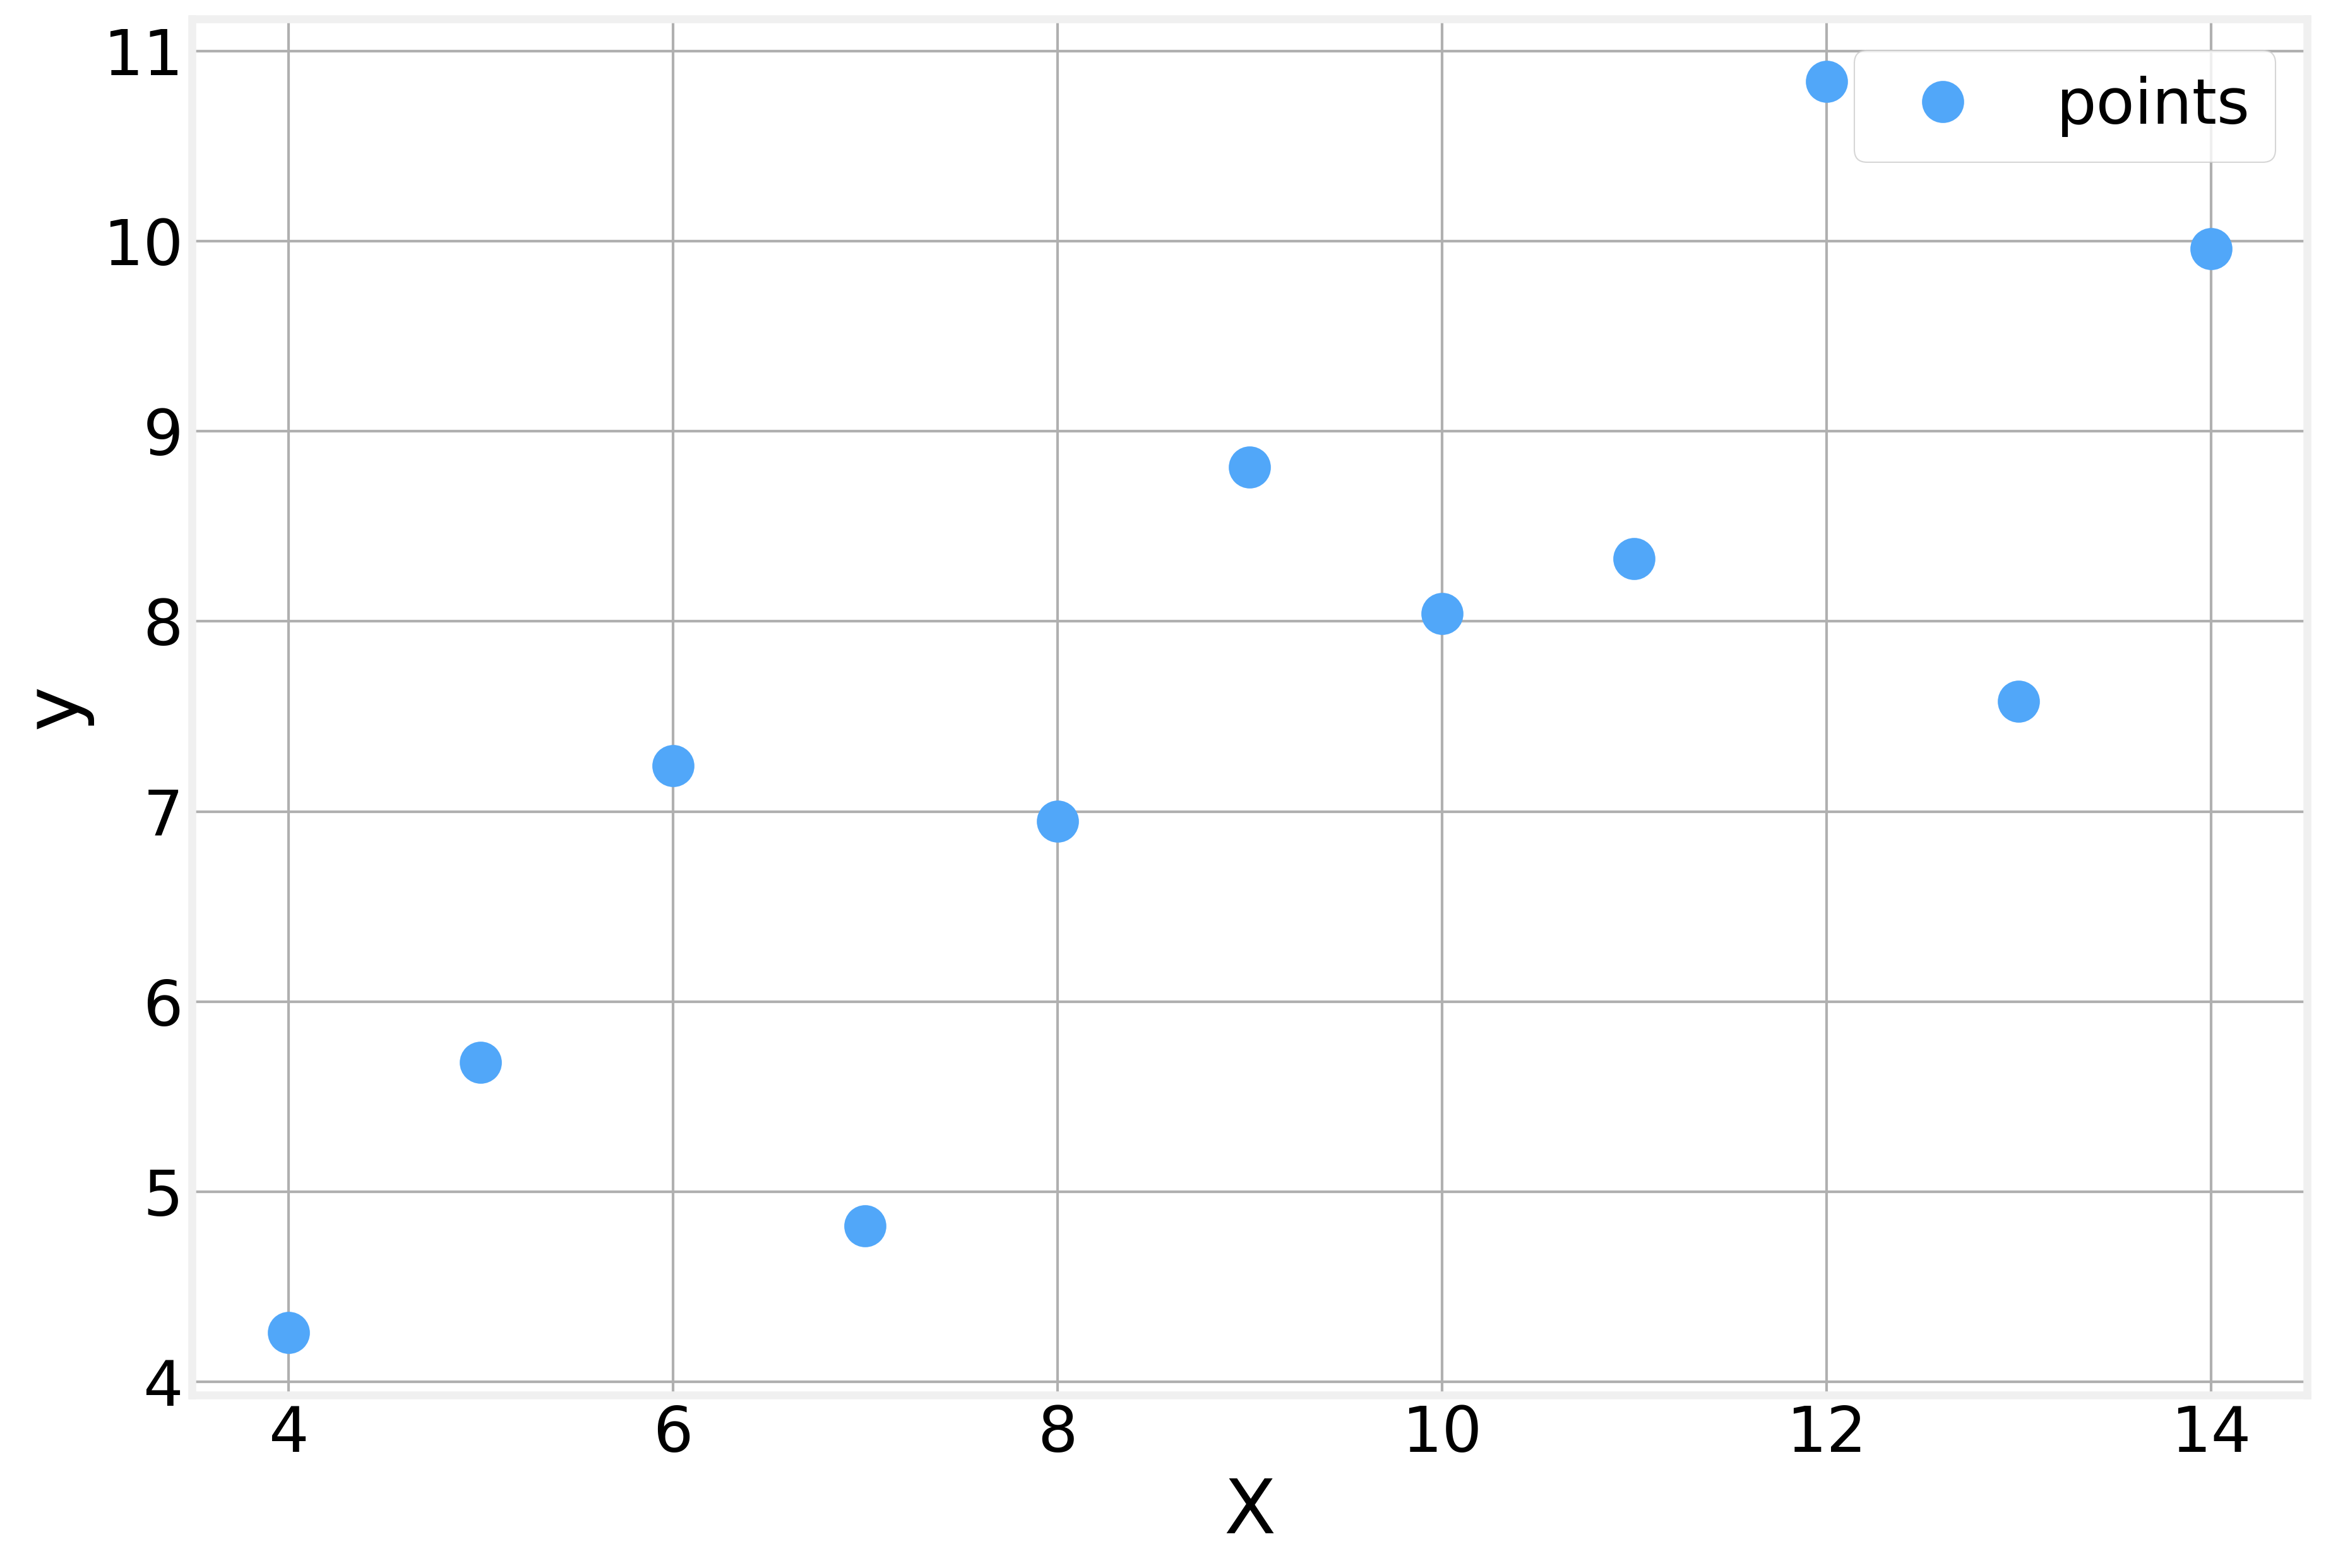

In [9]:
plt.plot(X, y, '.', markersize=30, label='points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 1.020367796458222 0.0008606623110252176 [0.32250196 0.76522446]
200 0.9431121797506379 0.0006922415484598154 [0.59873603 0.7378719 ]
300 0.8809745131515553 0.0005567786055876711 [0.84647236 0.71334117]
400 0.8309964044401443 0.00044782405264354175 [1.06865091 0.69134116]
500 0.7907983814521594 0.0003601905319529086 [1.26790835 0.67161078]
600 0.7584666047242105 0.00028970578632880883 [1.44660936 0.6539159 ]
700 0.7324617490451536 0.00023301401671360633 [1.60687464 0.63804651]
800 0.7115457157390089 0.00018741611161121607 [1.75060611 0.62381429]
900 0.6947226864300619 0.00015074114161373053 [1.8795095  0.61105034]
1000 0.6811917118428978 0.00012124300082738682 [1.99511453 0.59960318]
1100 0.6703085783764964 9.751727426354773e-05 [2.09879315 0.58933697]
1200 0.6615551369089554 7.843437324184244e-05 [2.19177574 0.58012988]
1300 0.6545146335684234 6.30857553414188e-05 [2.27516576 0.57187264]
1400 0.648851867961107 5.074066844079628e-05 [2.34995283 0.56446727]
1500 0.6442972341838887 4.

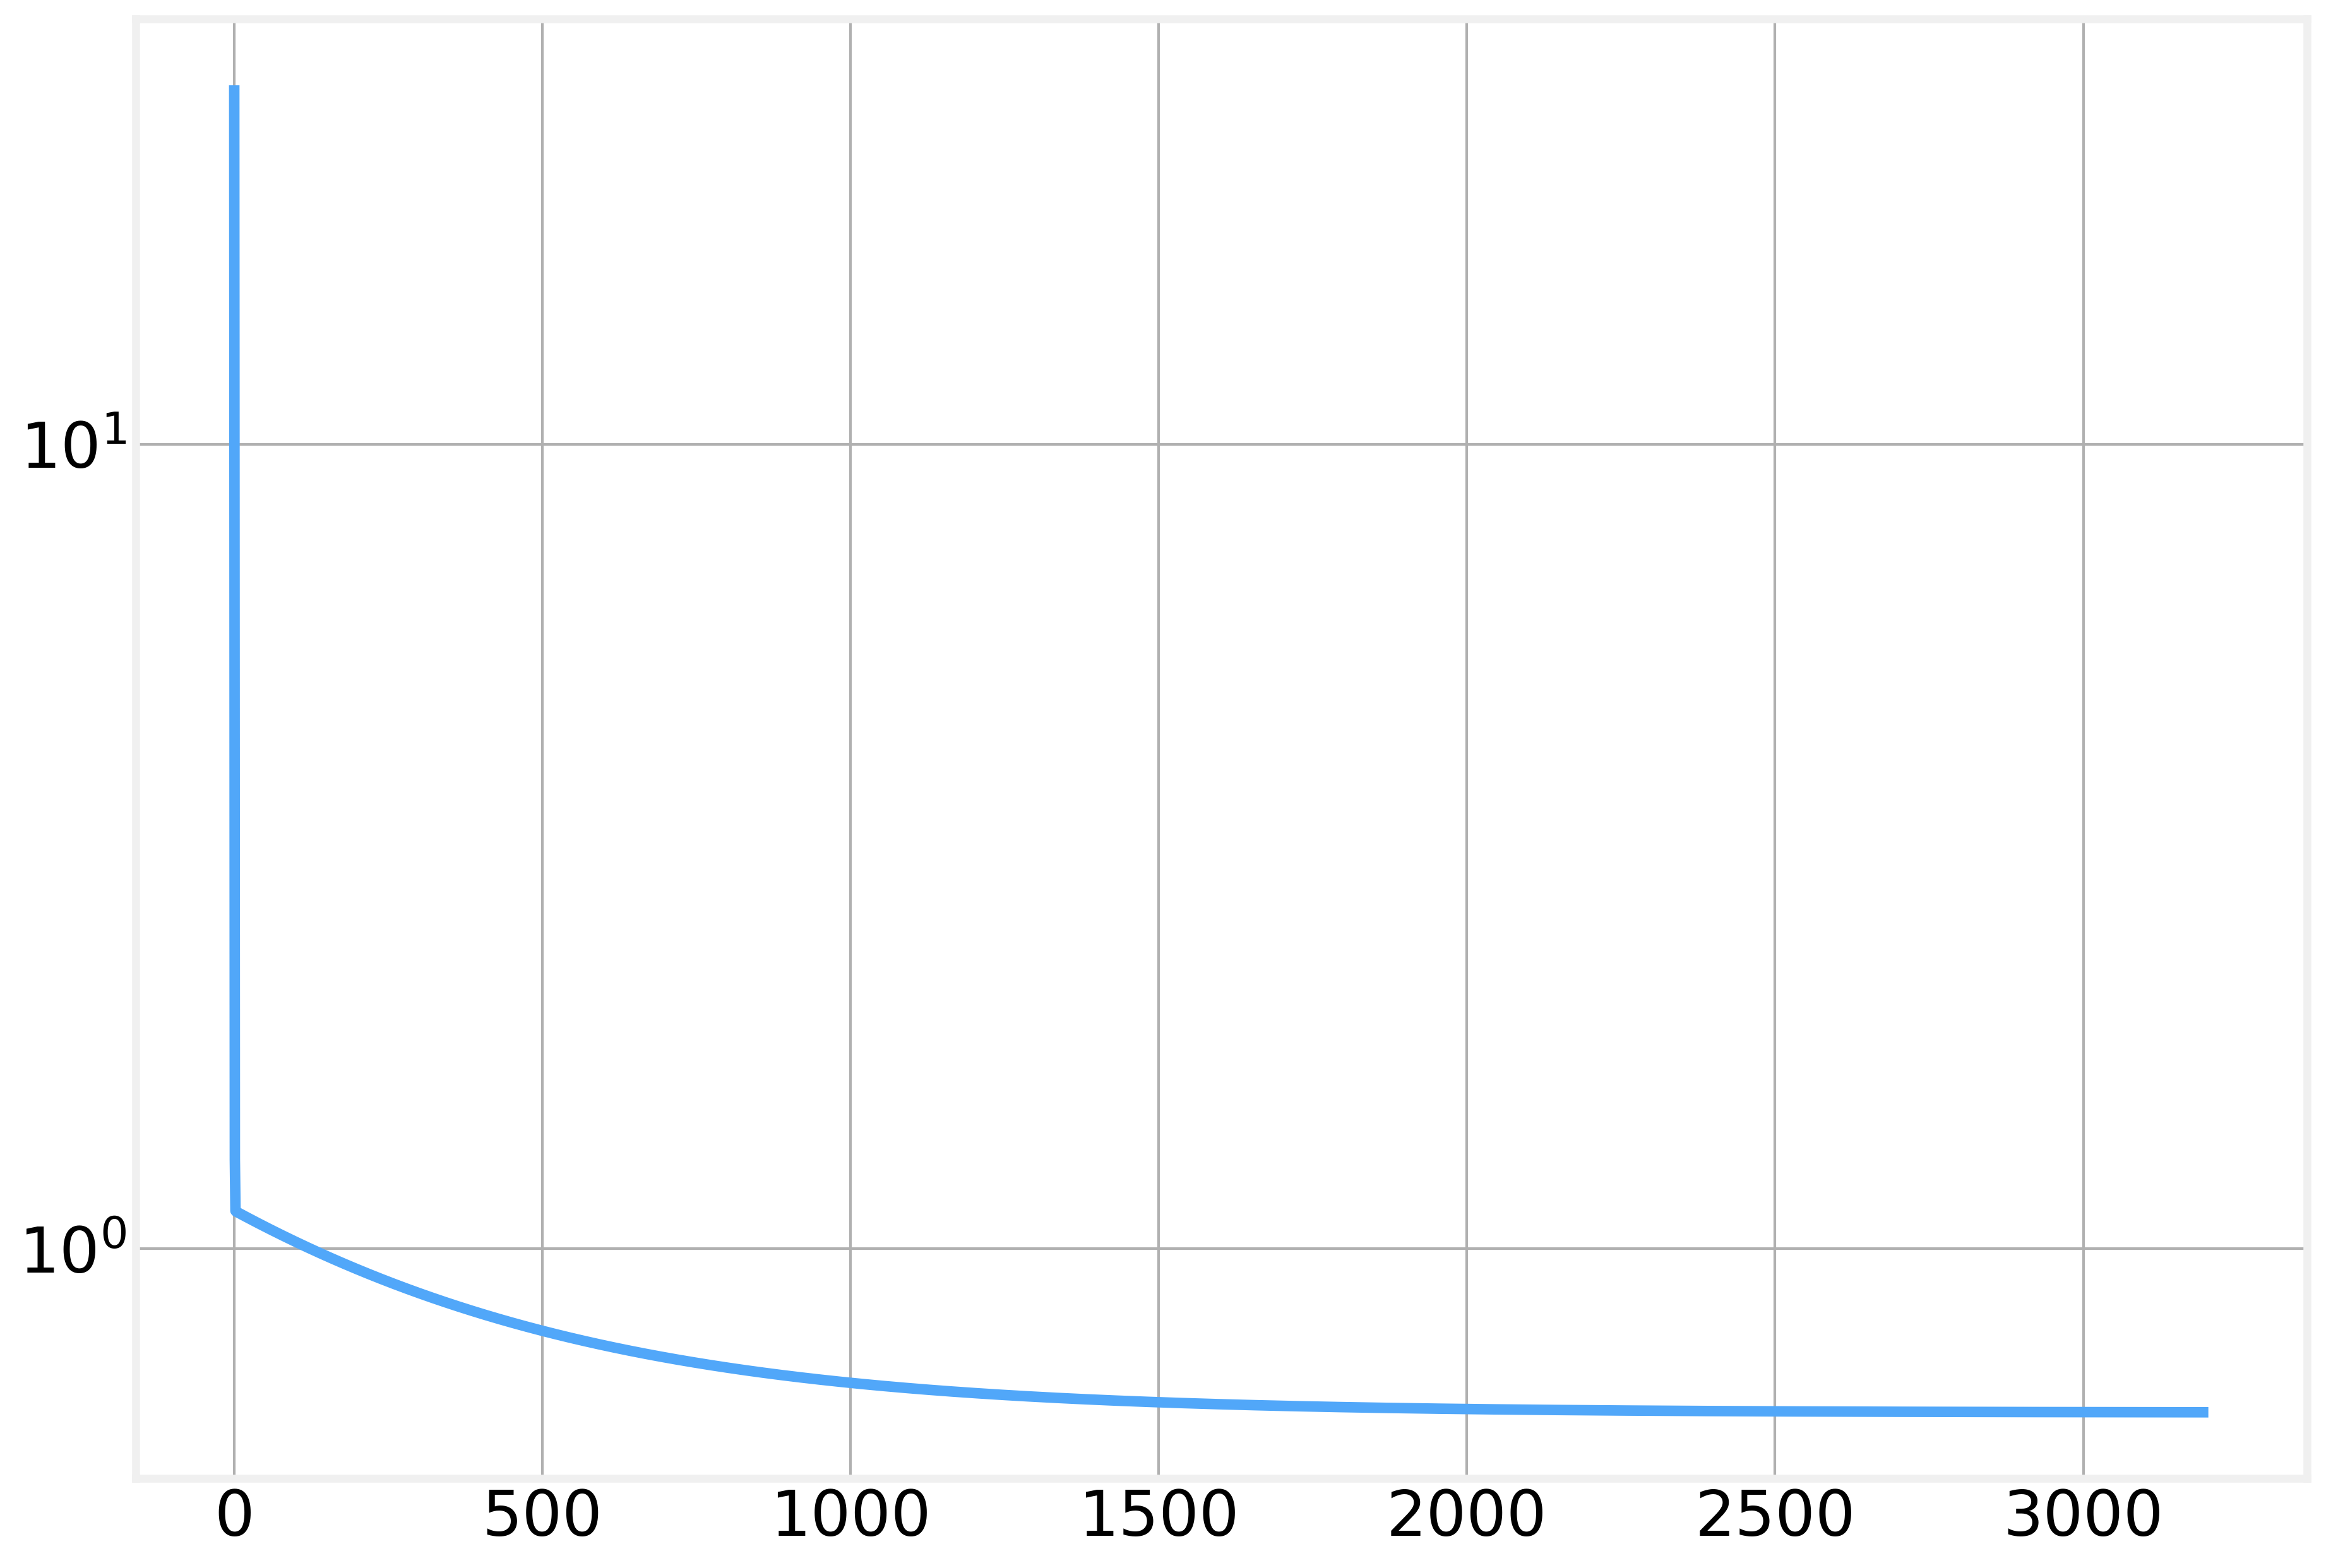

In [14]:
plt.semilogy(Js)

In [15]:
weights.flatten()

array([2.90890285, 0.50912031])

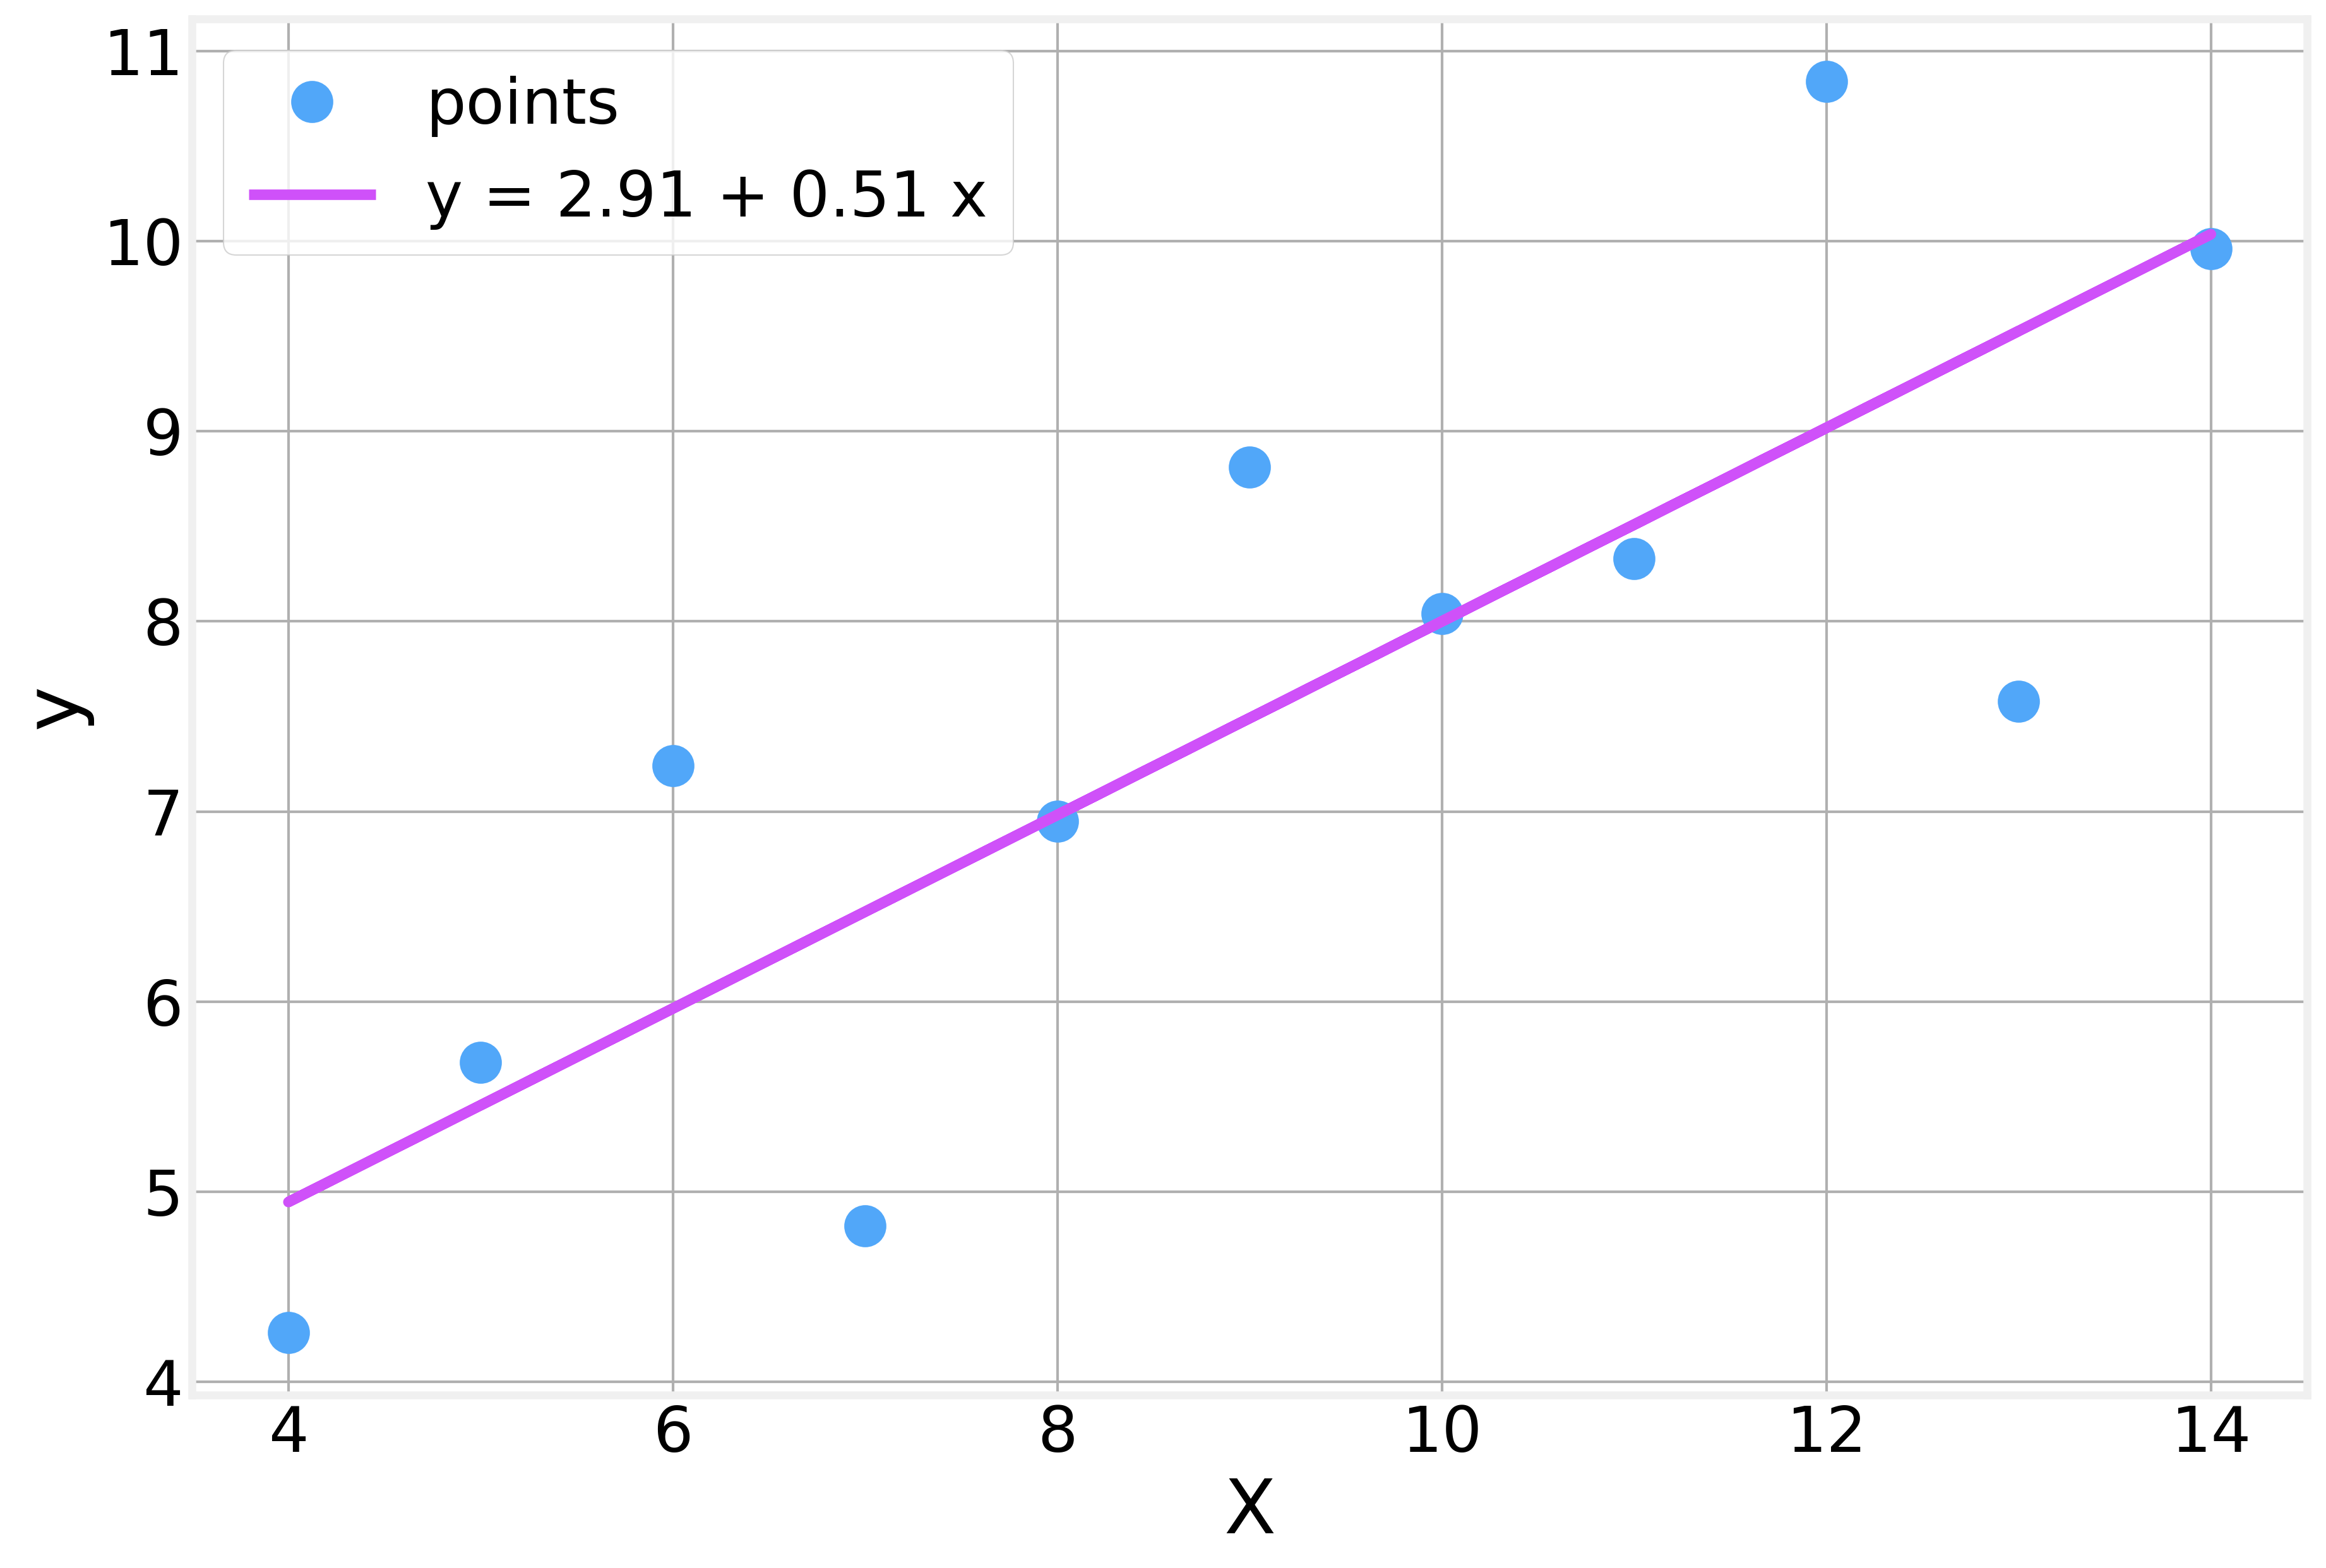

In [16]:
plt.plot(X.T[1], y, '.', markersize=30, label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), '-',\
         label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [17]:
weights

array([[2.90890285],
       [0.50912031]])

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>